In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from tqdm import tqdm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr


In [2]:
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as mp
from sklearn.pipeline import FeatureUnion

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.decomposition import PCA

In [4]:
# importing classifiers to try with
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [5]:
import gc
from sklearn.model_selection import train_test_split

In [3]:
train_df = pd.read_feather('../input/amexfeather/train_data.ftr')


# **EDA**

In [7]:
train_df.dtypes

customer_ID            object
S_2            datetime64[ns]
P_2                   float16
D_39                  float16
B_1                   float16
                    ...      
D_142                 float16
D_143                 float16
D_144                 float16
D_145                 float16
target                  int64
Length: 191, dtype: object

In [83]:
train_df.shape

(5531451, 191)

In [5]:
train_df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,5.485466e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.529435e+06,5.529435e+06,791314.000000,3.873055e+06,...,194699.000000,1.946990e+05,5.429903e+06,5.490819e+06,5.429903e+06,944408.000000,5.429903e+06,5.490724e+06,5.429903e+06,5.531451e+06
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.490972e-01
std,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.324903e-01
min,-4.589844e-01,0.000000e+00,-7.589844e+00,0.000000e+00,0.000000e+00,-6.269531e-01,0.000000e+00,0.000000e+00,-0.000454,1.192093e-07,...,0.000000,5.960464e-08,0.000000e+00,0.000000e+00,0.000000e+00,-0.014542,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.802246e-01,4.528046e-03,8.865356e-03,1.053467e-01,2.895355e-03,1.273193e-01,2.872467e-03,5.226135e-03,0.037506,4.226685e-02,...,0.002533,3.517151e-03,3.026962e-03,2.555847e-03,3.026962e-03,0.199341,3.028870e-03,2.752304e-03,3.028870e-03,0.000000e+00
50%,6.943359e-01,9.056091e-03,3.134155e-02,8.144531e-01,5.783081e-03,1.639404e-01,5.744934e-03,9.780884e-03,0.120544,8.850098e-02,...,0.005070,7.038116e-03,6.053925e-03,5.111694e-03,6.050110e-03,0.382080,6.053925e-03,5.508423e-03,6.053925e-03,0.000000e+00
75%,8.647461e-01,2.366943e-01,1.258545e-01,1.001953e+00,8.659363e-03,2.580566e-01,8.613586e-03,1.550293e-01,0.250977,1.843262e-01,...,0.007572,5.014648e-01,9.078979e-03,7.663727e-03,9.078979e-03,0.559082,9.078979e-03,8.262634e-03,9.078979e-03,0.000000e+00
max,1.009766e+00,5.390625e+00,1.324219e+00,1.009766e+00,3.255859e+00,5.484375e+00,8.992188e+00,1.625000e+00,4.191406,1.010938e+01,...,1.009766,3.005859e+00,1.009766e+00,1.009766e+00,1.339844e+00,2.228516,1.009766e+00,1.343750e+00,4.828125e+00,1.000000e+00


In [7]:
train_df.info(max_cols=200, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 191 columns):
 #    Column       Non-Null Count    Dtype         
---   ------       --------------    -----         
 0    customer_ID  5531451 non-null  object        
 1    S_2          5531451 non-null  datetime64[ns]
 2    P_2          5485466 non-null  float16       
 3    D_39         5531451 non-null  float16       
 4    B_1          5531451 non-null  float16       
 5    B_2          5529435 non-null  float16       
 6    R_1          5531451 non-null  float16       
 7    S_3          4510907 non-null  float16       
 8    D_41         5529435 non-null  float16       
 9    B_3          5529435 non-null  float16       
 10   D_42         791314 non-null   float16       
 11   D_43         3873055 non-null  float16       
 12   D_44         5257132 non-null  float16       
 13   B_4          5531451 non-null  float16       
 14   D_45         5529434 non-null  float16       
 1

# Missing Values

In [9]:
null_vals = train_df.isna().sum().sort_values(ascending=False)
null_vals[null_vals > 0 ]

D_87     5527586
D_88     5525447
D_108    5502513
D_111    5500117
D_110    5500117
          ...   
B_37          56
R_12          56
B_40          53
R_7            1
R_14           1
Length: 121, dtype: int64

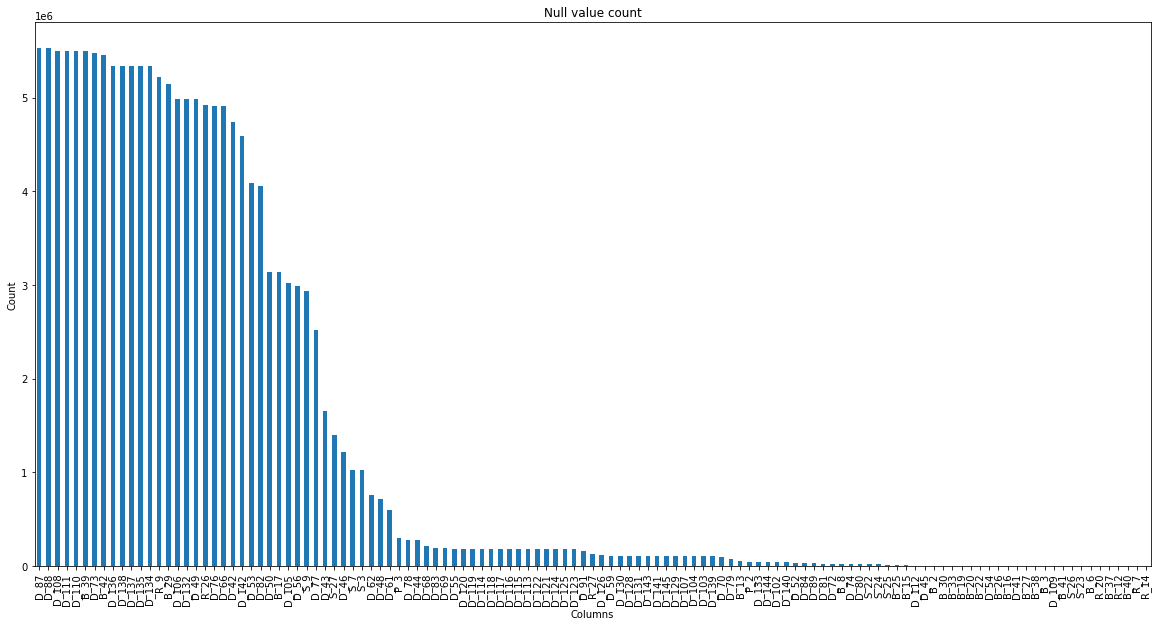

In [86]:
plt.figure(figsize=(20,10))
plt.title("Null value count")
plt.xlabel("Columns")
plt.ylabel("Count")
null_vals[null_vals > 0 ].plot(kind="bar");

# Check Target 

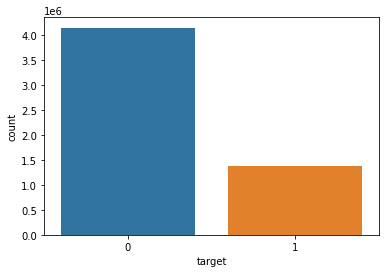

In [87]:
a=sns.countplot(data=train_df,x='target')

plt.show()

> Target is imbalance

In [11]:
all_cols_ = train_df.columns.to_list()
cat_cols_ = train_df.select_dtypes("category").columns.tolist()
num_cols_ = train_df.select_dtypes(include =['float16','int64']).columns.tolist()
num_cols_=list(set(train_df[num_cols_]) - {'target'})

# Categorical Features

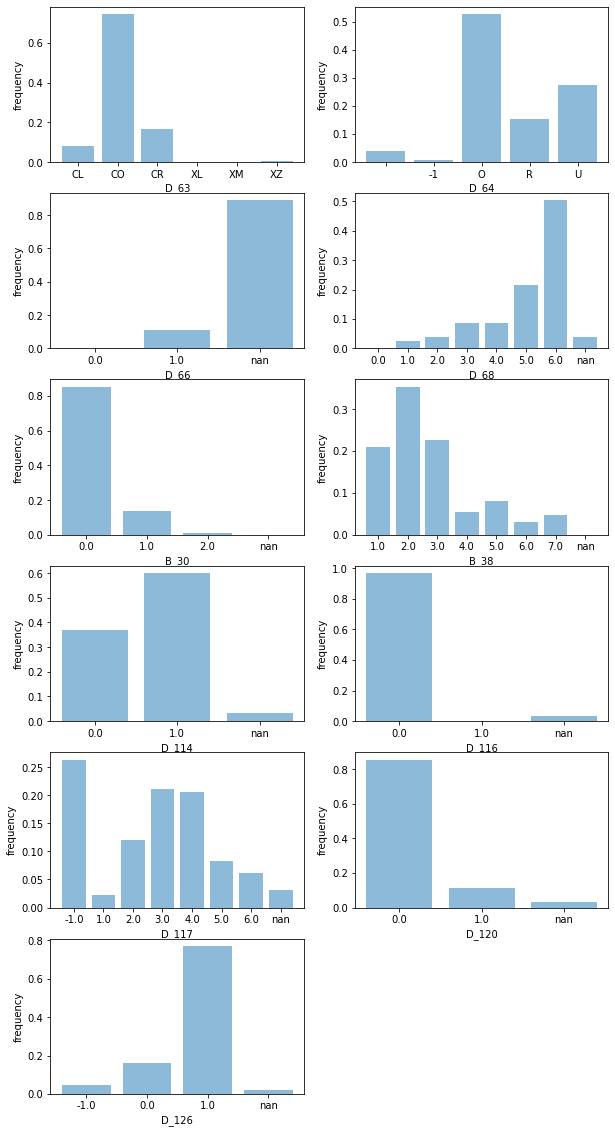

In [14]:
plt.figure(figsize=(10, 20))
for i, k in enumerate(cat_cols_):
    plt.subplot(6, 2, i+1)
    temp_val = pd.DataFrame(train_df[k].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp_val.index.name = 'value'
    temp_val.reset_index(inplace=True)
    plt.bar(temp_val.index, temp_val['count'], alpha=0.5)
    plt.xlabel(k)
    plt.ylabel('frequency')
    plt.xticks(temp_val.index, temp_val.value)
plt.show()

# Numerical Features

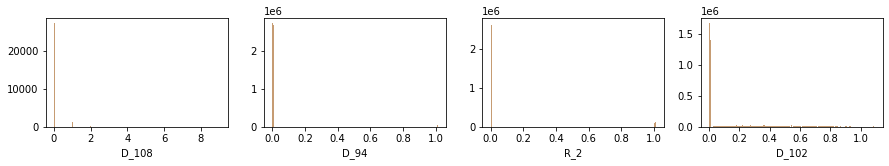

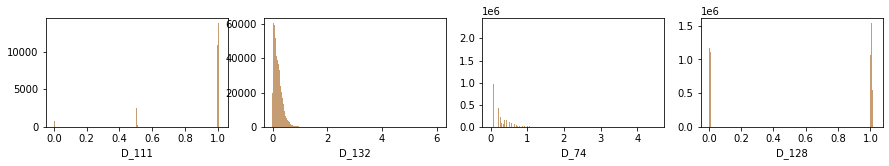

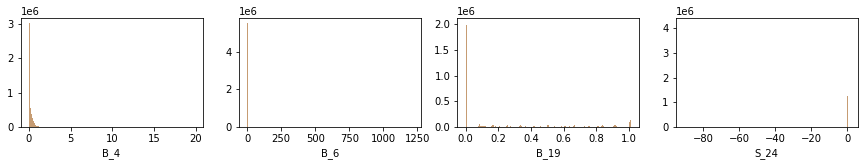

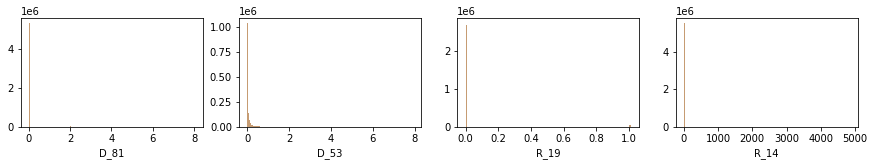

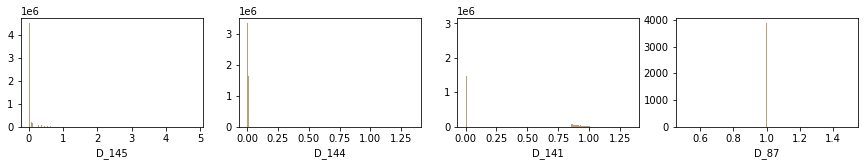

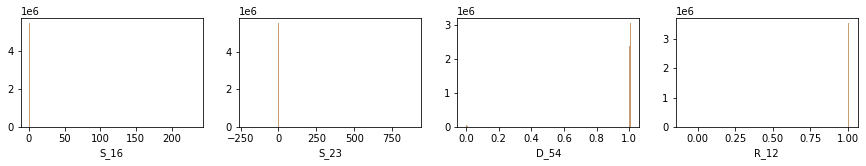

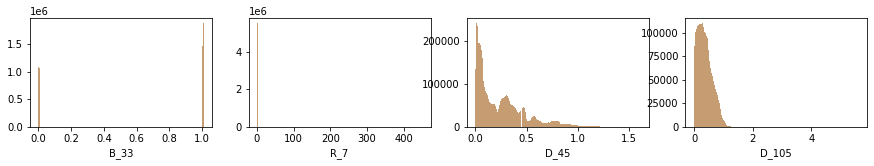

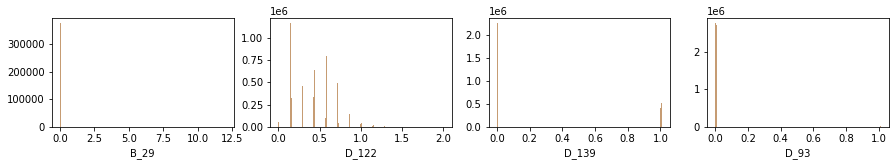

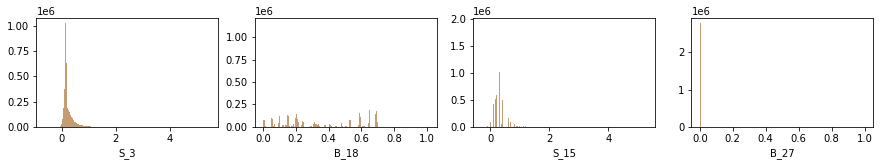

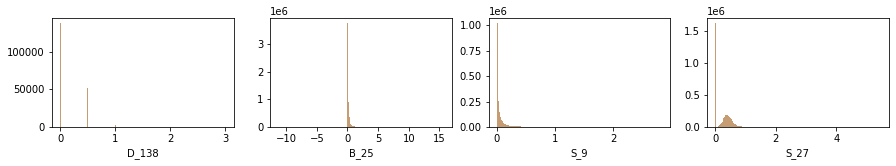

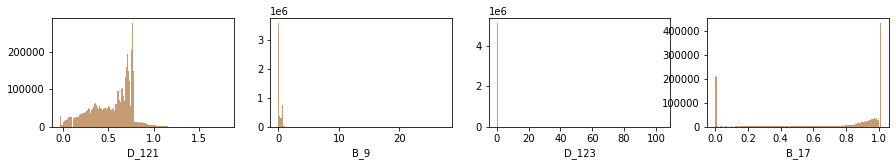

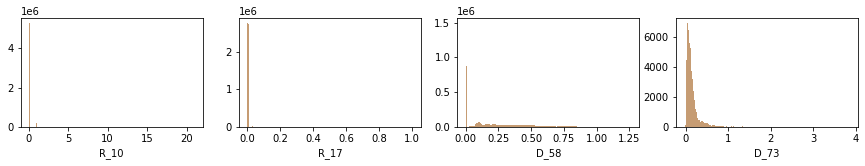

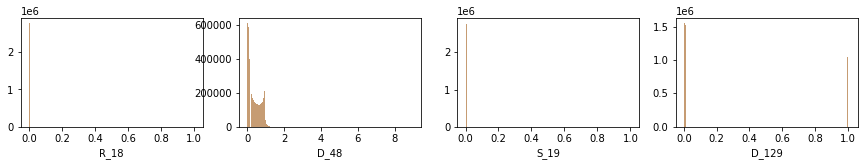

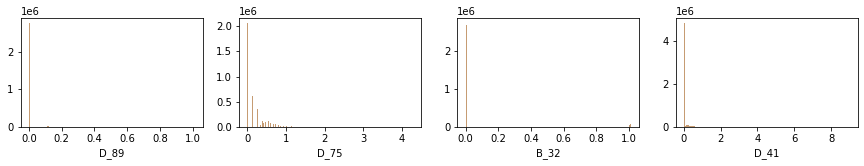

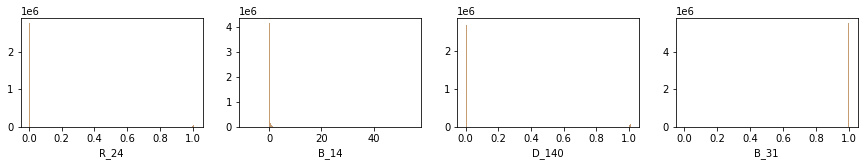

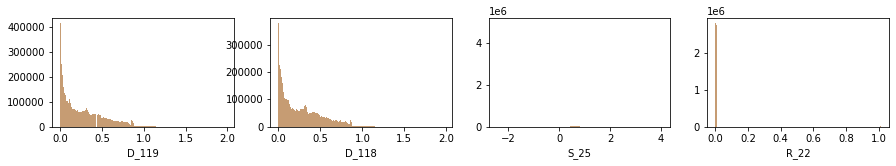

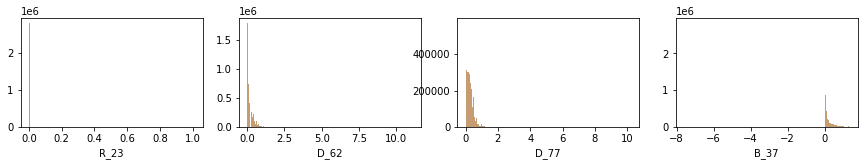

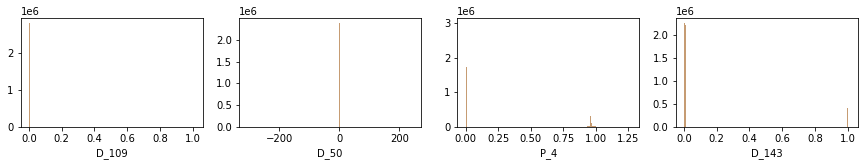

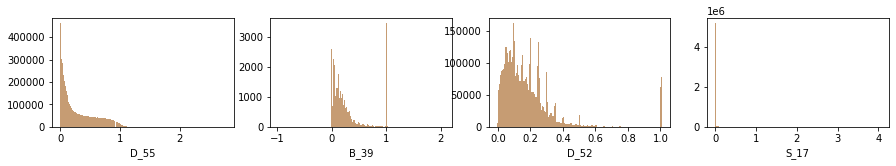

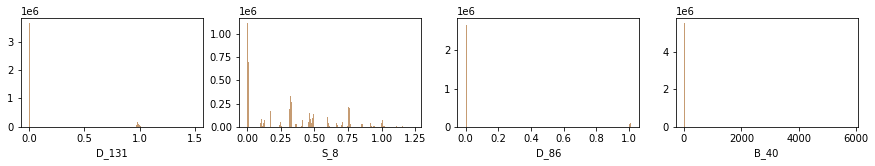

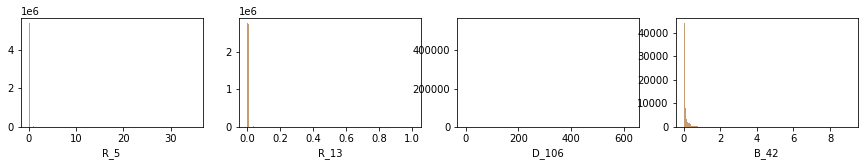

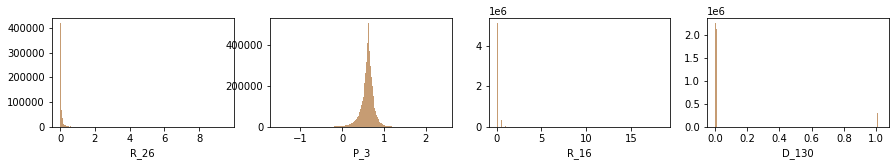

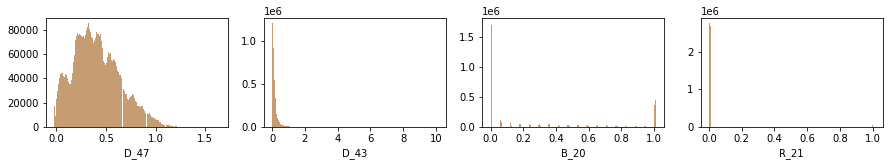

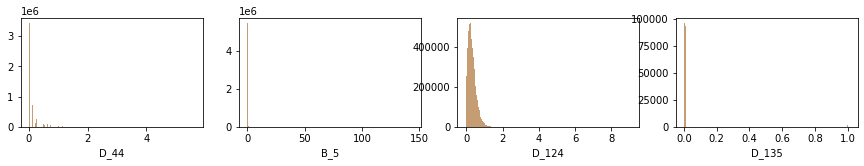

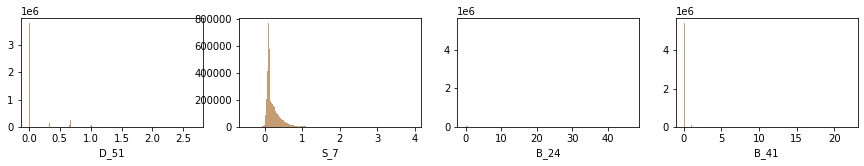

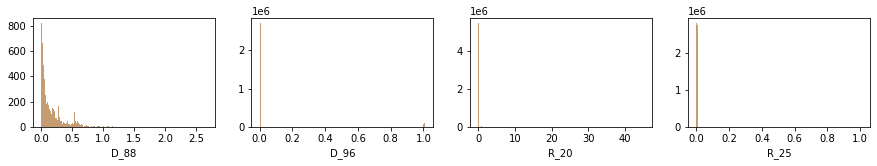

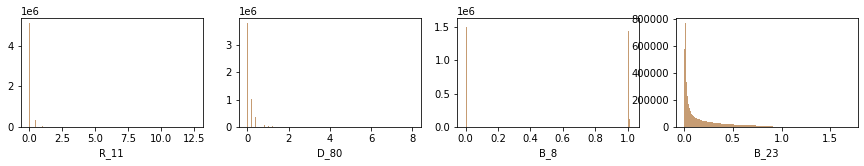

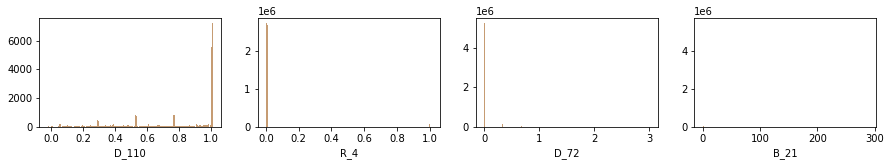

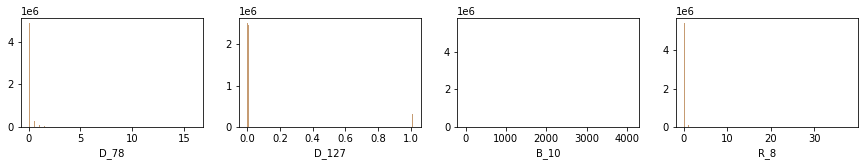

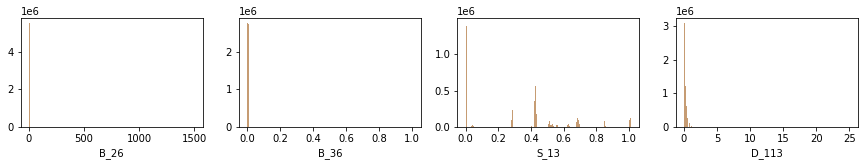

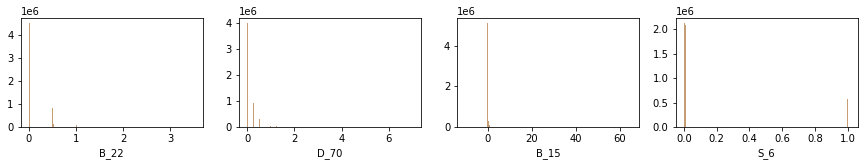

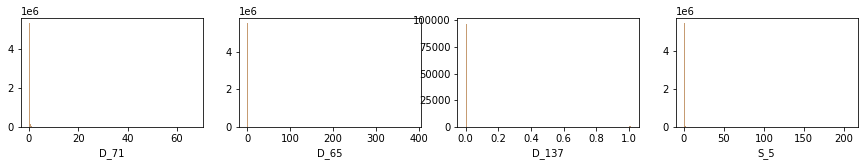

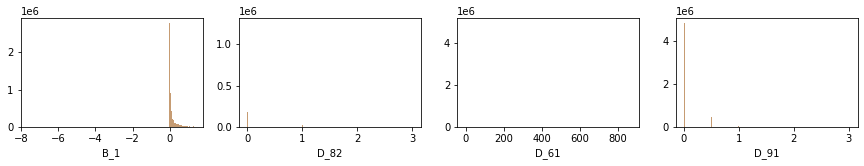

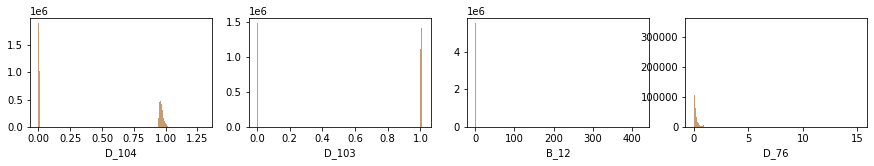

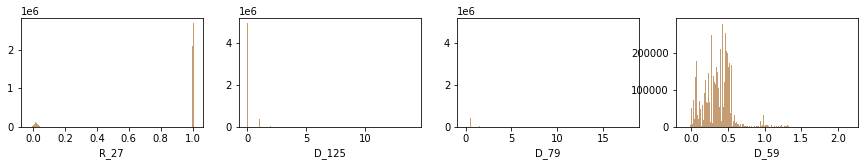

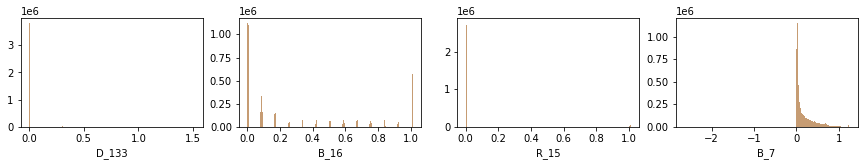

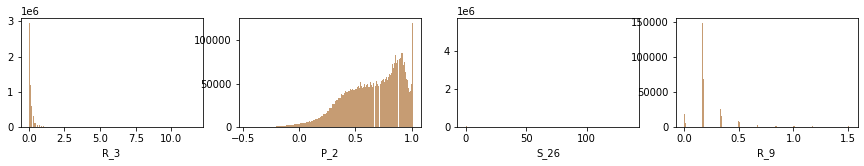

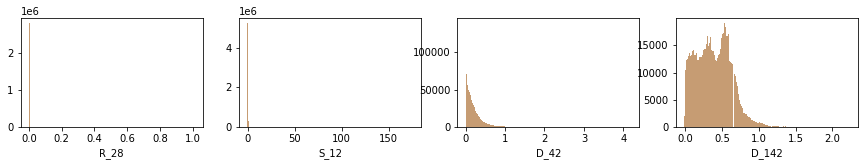

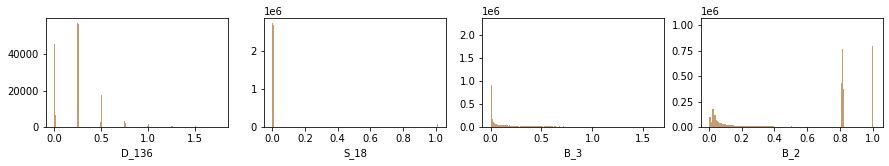

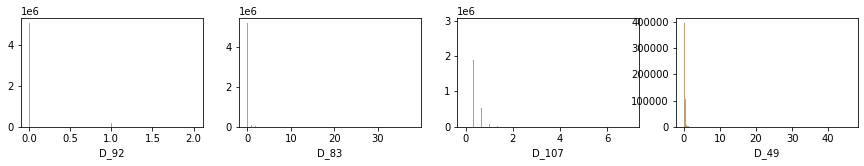

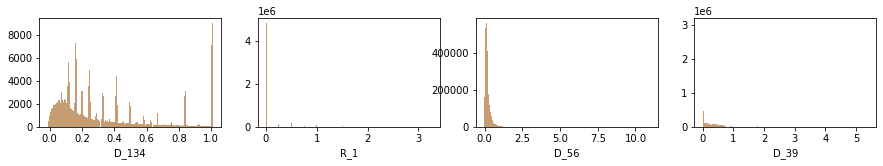

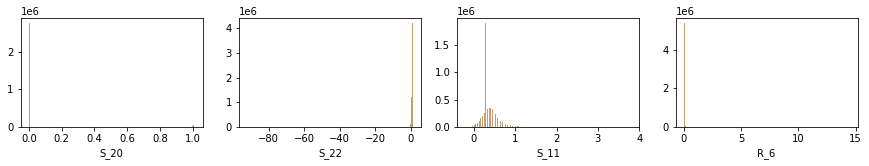

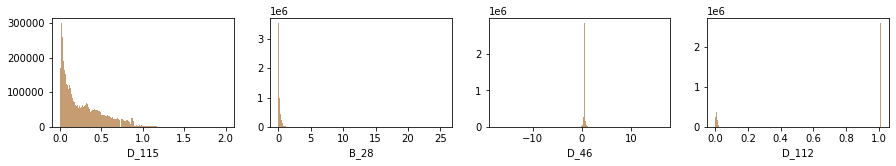

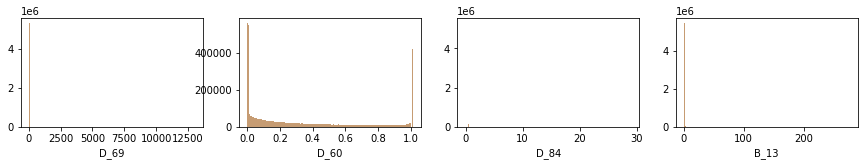

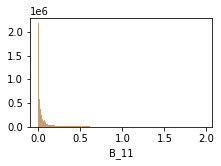

In [18]:
for i, l in enumerate(num_cols_):
    if i % 4 == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(15, 2))
    plt.subplot(1, 4, i % 4 + 1)
    plt.hist(train_df[l], bins=200, color='#C69C73')
    plt.xlabel(l)
plt.show()

# **Feature Engineering**

In [19]:
train_df = (train_df.groupby('customer_ID')
            .tail(1).set_index('customer_ID',drop=True)
            .sort_index()
            .drop(['S_2'],axis='columns')
           )

# Handle Missing Values

 **Drop columns with more 50% missing values.**

In [20]:
to_drop = [column for column in train_df.columns if (train_df[column].isnull().sum()/len(train_df[column])*100) >=50]
train_df = train_df.drop(columns = to_drop)
print('number of columns with >= 50% missing value = ', len(to_drop))

number of columns with >= 50% missing value =  29


In [21]:
to_drop

['D_42',
 'D_49',
 'D_50',
 'D_53',
 'D_56',
 'B_17',
 'D_66',
 'D_73',
 'D_76',
 'R_9',
 'D_82',
 'B_29',
 'D_87',
 'D_88',
 'D_105',
 'D_106',
 'R_26',
 'D_108',
 'D_110',
 'D_111',
 'B_39',
 'B_42',
 'D_132',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_142']

# Handling Outliers

In [ ]:
def detect_outliers_zscore(data):
    outliers=[]
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    print(outliers)
    return outliers

def replace_outliers(data):
    outliers=detect_outliers_zscore(data)
    median = np.median(data)
    for i in outliers:
        data.replace(i,median,inplace=True) #Replace with median
    return data

In [ ]:
train_df = replace_outliers(train_df)

In [22]:
all_cols = train_df.columns.to_list()
cat_cols = train_df.select_dtypes("category").columns.tolist()
num_cols = train_df.select_dtypes(include =['float16','int64']).columns.tolist()
num_cols=list(set(train_df[num_cols]) - {'target'})

In [23]:
train_df = train_df
x = train_df[cat_cols+num_cols]
y = train_df['target']
print(x.shape,y.shape)

(458913, 159) (458913,)


# **Categorical pipeline**
# 1. To replace missing values with most frequent value
# 2. Encode categorical variables with ordinal encorder 
# 3. To do standard scaling.

In [22]:
# define categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())
])
print(cat_pipe)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder()), ('scaler', StandardScaler())])


# **Numerical pipeline**
# 1. To replace missing values with median value
# 2. To do standard scaling

In [23]:
# define numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])
print(num_pipe)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])


In [24]:
preprocess = ColumnTransformer([
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
])

# Remove highly correlated features

In [24]:
train_df_w_o_target = train_df.drop(["target"],axis=1)

cor_matrix = train_df_w_o_target.corr()
col_core = set()

for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if(cor_matrix.iloc[i, j] > 0.9):
            col_name = cor_matrix.columns[i]
            col_core.add(col_name)
col_core

{'B_11',
 'B_13',
 'B_15',
 'B_23',
 'B_33',
 'B_37',
 'D_104',
 'D_119',
 'D_141',
 'D_143',
 'D_74',
 'D_75',
 'D_77',
 'S_24',
 'S_7'}

In [25]:
train_df = train_df.drop(col_core, axis=1)


# SMOTE

In [1]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Cross Validation

In [26]:
## Split the train set 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2,random_state=26,stratify=y)
print(xtrain.shape,'\n',xtest.shape)

(367130, 159) 
 (91783, 159)


In [27]:
xtrain.head()

,D_63,D_64,D_68,B_30,B_38,D_114,D_116,D_117,D_120,D_126,...,R_6,D_115,B_28,D_46,D_112,D_69,D_60,D_84,B_13,B_11
customer_ID,,,,,,,,,,,,,,,,,,,,,
1a9f4ab7f95ed748cdd24b8f75a38341269468f525a0ab34ad0788afa1eaa98c,CO,O,6.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,...,0.007042,0.409180,0.003452,0.056610,1.004883,0.005894,1.001953,0.005547,0.005898,0.003841
76668169ddf49bbfd3887b778fa46a2d00d0fa5809a101bac13dc038eff646d6,CR,O,6.0,0.0,3.0,1.0,0.0,4.0,0.0,1.0,...,0.008278,0.668945,0.166382,0.472168,0.010170,0.009430,0.889160,0.002197,0.138794,0.053833
3efde6c013dfa372b66febe51f66c1c113735238ccc849cabe0bc4524cc8726e,CO,U,6.0,0.0,2.0,0.0,0.0,4.0,1.0,1.0,...,0.008240,0.487305,0.192627,0.606934,1.003906,0.005814,0.003258,0.007988,0.013222,0.007214
b301484f5a942bb670ecc170e58c60db77a617df1f9d0bdee54c335b1f8a91f9,CO,O,4.0,0.0,2.0,1.0,0.0,4.0,0.0,0.0,...,0.002359,0.113281,0.054901,0.450439,1.002930,0.000340,0.260986,0.002951,0.039337,0.023895
ff74cdc573c3306c0fbcb972a7e205c4fab7b7f4fac67c8f9757d3e6c3d6c786,CR,O,6.0,0.0,2.0,1.0,0.0,-1.0,0.0,1.0,...,0.009392,0.798828,0.021439,NaN,0.014740,0.001161,1.004883,0.002214,0.075562,0.021088


In [28]:
xtrain_cus_id = xtrain.index
xtest_cus_id = xtest.index

In [30]:
preprocess.fit(xtrain)
xtrain = preprocess.transform(xtrain)
xtest = preprocess.transform(xtest)

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [31]:
xtrain = pd.DataFrame(xtrain, columns = cat_cols + num_cols )
xtest = pd.DataFrame(xtest, columns = cat_cols + num_cols )

In [32]:
xtrain.head()

,D_63,D_64,D_68,B_30,B_38,D_114,D_116,D_117,D_120,D_126,...,R_13,R_8,B_26,S_19,B_20,B_1,D_130,R_20,D_45,S_5
0,-0.214045,-0.782623,-0.027551,-0.430995,-0.497783,0.772077,-0.050683,-1.345346,-0.481082,0.539776,...,-0.174438,-0.162964,-0.049805,-0.345703,-0.686523,-0.592773,-0.529297,-0.128296,-0.380371,-0.246704
1,-0.214045,-0.782623,-0.027551,-0.430995,0.098066,-1.295208,-0.050683,-1.345346,-0.481082,0.539776,...,-0.455322,-0.162354,-0.049683,0.345215,-0.682129,-0.522949,-0.536621,-0.120544,-0.780273,-0.116943
2,-0.214045,-0.782623,-0.027551,2.021535,2.481460,0.772077,-0.050683,0.723818,-0.481082,0.539776,...,0.267822,-0.156128,-0.051208,1.115234,1.897461,1.249023,-0.539551,-0.122803,0.259277,-0.210938
3,-0.214045,1.408854,-1.570188,-0.430995,-0.497783,-1.295208,-0.050683,0.206527,-0.481082,-1.852619,...,-0.229004,-0.163818,-0.052948,0.335938,-0.687500,-0.491699,-0.526367,-0.131836,-0.742676,-0.078186
4,-0.214045,0.313115,-0.798870,-0.430995,-0.497783,-1.295208,-0.050683,-1.345346,-0.481082,0.539776,...,-0.418701,-0.166870,-0.050140,0.643066,-0.673828,-0.398438,-0.534180,-0.125000,-0.780762,-0.174805


In [33]:
xtrain['customer_ID']=xtrain_cus_id

In [35]:
xtrain = (xtrain.groupby('customer_ID')
            .tail(1).set_index('customer_ID',drop=True)
            .sort_index()
           )

# PCA

In [39]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(xtrain)
xtrain = pca.transform(xtrain)
xtest =pca.transform(xtest)

In [42]:
import gc
gc.collect()

23

# Test dataset

In [ ]:
%%time 

## Load the test dataset 
test_df =pd.read_feather('../input/amexfeather/test_data.ftr')
test_df.head(5)

In [ ]:
# Group and sort the test dataset by customer_id

test_df = (test_df.groupby('customer_ID').tail(1)
          .set_index('customer_ID',drop=True)
          .sort_index()
          .drop(['S_2'],axis='columns'))
test_df.head(5)


In [ ]:
test_df = test_df.drop(columns = to_drop)

In [ ]:
test_df = test_df.drop(col_core, axis=1)

In [ ]:
test_cat_cols = test_df.select_dtypes("category").columns.tolist()
test_num_cols = test_df.select_dtypes(include =['float16','int64']).columns.tolist()

In [ ]:
x_test = test_df[test_cat_cols+test_num_cols]

In [ ]:
x_test_cus_id = x_test.index

In [ ]:
x_test = preprocess.transform(x_test)

In [ ]:
x_test = pd.DataFrame(x_test, columns = test_cat_cols + test_num_cols )

In [ ]:
x_test['customer_ID']=x_test_cus_id

In [ ]:
x_test = (x_test.groupby('customer_ID')
            .tail(1).set_index('customer_ID',drop=True)
            .sort_index()
           )

# Model Training

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
scoring = ['accuracy', 'precision', 'recall','f1','roc_auc']
cv = StratifiedKFold(n_splits=3, shuffle = True, random_state = 42)

In [45]:
from sklearn.model_selection import cross_validate

In [47]:
%%time

algo=[
    [KNeighborsClassifier(), 'KNeighborsClassifier'], 
    [SVC(), 'SVC'],
    [XGBClassifier(), "XGBClassifier"],
    [LGBMClassifier(), "LGBMClassifier"]
]

model_scores=[]
for a in algo:
    model = a[0]
    print(model)
    scores = cross_validate(model, xtrain, ytrain, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True,return_estimator=True)
    print('Training Score: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f},f1-score: {:.2f}, ROC AUC: {:.2f}'.format(np.mean(scores['train_accuracy']),np.mean(scores['train_precision']), np.mean(scores['train_recall']), np.mean(scores['train_f1']), np.mean(scores['train_roc_auc'])))
    print('Validation Score: Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f},f1-score: {:.2f}, ROC AUC: {:.2f}'.format(np.mean(scores['test_accuracy']),np.mean(scores['test_precision']), np.mean(scores['test_recall']), np.mean(scores['test_f1']), np.mean(scores['test_roc_auc'])))
    model_scores.append([np.mean(scores['test_accuracy']), a[1]])

print(model_scores)
print(f'best score = {max(model_scores)}')  

KNeighborsClassifier()
Training Score: Accuracy: 0.77, Precision: 0.65, Recall: 0.28,f1-score: 0.39, ROC AUC: 0.78
Validation Score: Accuracy: 0.68, Precision: 0.28, Recall: 0.13,f1-score: 0.18, ROC AUC: 0.50
SVC()
Training Score: Accuracy: 0.76, Precision: 1.00, Recall: 0.09,f1-score: 0.16, ROC AUC: 0.96
Validation Score: Accuracy: 0.74, Precision: 0.00, Recall: 0.00,f1-score: 0.00, ROC AUC: 0.49
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_